In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [9]:
df = pd.read_csv('ifood_df.csv')


In [10]:
df.shape

(2205, 39)

In [11]:
df.head(10)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
5,62513,0,1,16,520,42,98,0,42,14,...,1,0,0,0,0,1,0,702,688,0
6,55635,0,1,34,235,65,164,50,49,27,...,0,0,0,0,1,0,0,563,536,0
7,33454,1,0,32,76,10,56,3,1,23,...,0,0,0,0,0,0,1,146,123,0
8,30351,1,0,19,14,0,24,3,3,2,...,1,0,0,0,0,0,1,44,42,0
9,5648,1,1,68,28,0,6,1,1,13,...,1,0,0,0,0,0,1,36,23,1


In [12]:
df.tail(10)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
2195,24434,2,0,9,3,2,8,20,0,17,...,0,0,0,0,1,0,0,33,16,0
2196,11012,1,0,82,24,3,26,7,1,23,...,0,0,0,0,1,0,0,61,38,1
2197,44802,0,0,71,853,10,143,13,10,20,...,0,0,0,0,0,1,0,1029,1009,0
2198,26816,0,0,50,5,1,6,3,4,3,...,0,0,0,0,1,0,0,19,16,0
2199,34421,1,0,81,3,3,7,6,2,9,...,0,0,0,0,1,0,0,21,12,0
2200,61223,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0
2204,52869,1,1,40,84,3,61,2,1,21,...,0,0,0,0,0,0,1,151,130,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Income                2205 non-null   int64
 1   Kidhome               2205 non-null   int64
 2   Teenhome              2205 non-null   int64
 3   Recency               2205 non-null   int64
 4   MntWines              2205 non-null   int64
 5   MntFruits             2205 non-null   int64
 6   MntMeatProducts       2205 non-null   int64
 7   MntFishProducts       2205 non-null   int64
 8   MntSweetProducts      2205 non-null   int64
 9   MntGoldProds          2205 non-null   int64
 10  NumDealsPurchases     2205 non-null   int64
 11  NumWebPurchases       2205 non-null   int64
 12  NumCatalogPurchases   2205 non-null   int64
 13  NumStorePurchases     2205 non-null   int64
 14  NumWebVisitsMonth     2205 non-null   int64
 15  AcceptedCmp3          2205 non-null   int64
 16  Accept

In [14]:
df.isnull().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [15]:
df.duplicated().sum()

np.int64(184)

In [58]:
!pip install tabulate

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import pandas as pd

#Load the original dataset AGAIN to ensure the DataFrame 'df' is fresh
df = pd.read_csv("ifood_df.csv")

# These lists contain the  correct column names.
marital_cols = ['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow']
education_cols = ['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']

# Create the consolidated columns 
df['Marital_Status'] = df[marital_cols].idxmax(axis=1).str.replace('marital_', '')
df['Education'] = df[education_cols].idxmax(axis=1).str.replace('education_', '').replace('2n Cycle', '2nd Cycle')

# Drop the messy columns we just replaced
df.drop(columns=marital_cols + education_cols + ['Z_CostContact', 'Z_Revenue'], inplace=True)


In [17]:
# Total Purchases 
purchase_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']
df['TotalPurchases'] = df[purchase_cols].sum(axis=1)

# Total Dependents (Family Context)
df['Dependents'] = df['Kidhome'] + df['Teenhome']

#Final Inspection
clustering_features = ['Income', 'Recency', 'MntTotal', 'TotalPurchases', 'Dependents']

print("\nEngineered Features and Cleaned Data Head (First 5 Rows):")
print(df[clustering_features].head().to_markdown(index=False, numalign="left", stralign="left"))


Engineered Features and Cleaned Data Head (First 5 Rows):
| Income   | Recency   | MntTotal   | TotalPurchases   | Dependents   |
|:---------|:----------|:-----------|:-----------------|:-------------|
| 58138    | 58        | 1529       | 25               | 0            |
| 46344    | 38        | 21         | 6                | 2            |
| 71613    | 26        | 734        | 21               | 0            |
| 26646    | 26        | 48         | 8                | 1            |
| 58293    | 94        | 407        | 19               | 1            |


In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2205.0,51622.094785,20713.063826,1730.0,35196.0,51287.0,68281.0,113734.0
Kidhome,2205.0,0.442177,0.537132,0.0,0.0,0.0,1.0,2.0
Teenhome,2205.0,0.506576,0.544380,0.0,0.0,0.0,1.0,2.0
Recency,2205.0,49.009070,28.932111,0.0,24.0,49.0,74.0,99.0
MntWines,2205.0,306.164626,337.493839,0.0,24.0,178.0,507.0,1493.0
MntFruits,2205.0,26.403175,39.784484,0.0,2.0,8.0,33.0,199.0
MntMeatProducts,2205.0,165.312018,217.784507,0.0,16.0,68.0,232.0,1725.0
MntFishProducts,2205.0,37.756463,54.824635,0.0,3.0,12.0,50.0,259.0
MntSweetProducts,2205.0,27.128345,41.130468,0.0,1.0,8.0,34.0,262.0
MntGoldProds,2205.0,44.057143,51.736211,0.0,9.0,25.0,56.0,321.0


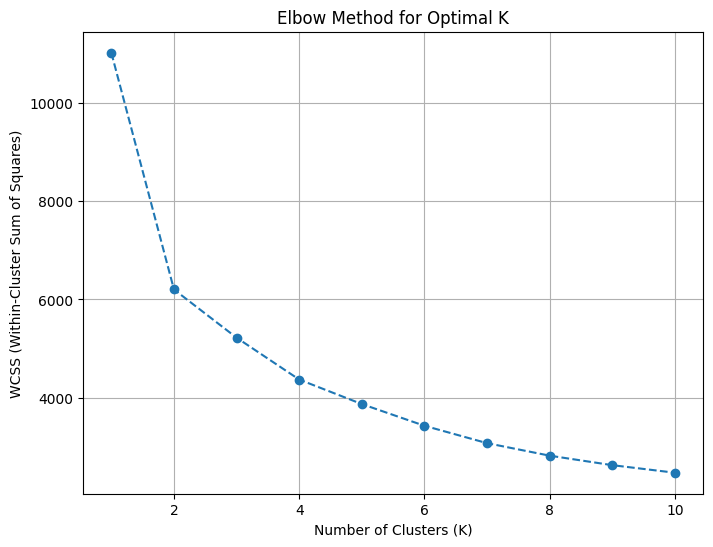

In [29]:
# Select the features for clustering (Monetary, Recency, Frequency, etc.)
clustering_features = ['Income', 'Recency', 'MntTotal', 'TotalPurchases', 'Dependents']
X = df[clustering_features]

#Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Elbow Method to find Optimal K
wcss = []
# Test K from 1 to 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)


plt.show()

In [19]:
#Run K-Means Clustering (K=4)
K = 4
kmeans = KMeans(n_clusters=K, init='k-means++', random_state=42, n_init=10)

# Fit the model and assign the cluster label to the original DataFrame
df['Cluster'] = kmeans.fit_predict(X_scaled)

#Calculate Averages
# Aggregate the original (unscaled) features by cluster
cluster_profiles = df.groupby('Cluster')[clustering_features].mean().reset_index()

# Calculate Campaign Success Rate
campaign_success = df.groupby('Cluster')['Response'].mean().reset_index()
campaign_success['Response_Rate_%'] = (campaign_success['Response'] * 100).round(2)

# Merge profiles and campaign success for the final table
final_profile = cluster_profiles.round(2)
final_profile['Response_Rate_%'] = campaign_success['Response_Rate_%']

# Rename columns for clear output
final_profile.columns = ['Cluster', 'Avg_Income', 'Avg_Recency (Days)', 'Avg_MntTotal ($)', 'Avg_TotalPurchases', 'Avg_Dependents', 'Response_Rate (%)']

print("--- Final Customer Segment Profiles (K=4) ---")
print(final_profile.to_markdown(index=False, numalign="left", stralign="left"))


--- Final Customer Segment Profiles (K=4) ---
| Cluster   | Avg_Income   | Avg_Recency (Days)   | Avg_MntTotal ($)   | Avg_TotalPurchases   | Avg_Dependents   | Response_Rate (%)   |
|:----------|:-------------|:---------------------|:-------------------|:---------------------|:-----------------|:--------------------|
| 0         | 61889        | 48.51                | 783.21             | 22.4                 | 1.22             | 11.31               |
| 1         | 35971.9      | 74.71                | 108.34             | 8.91                 | 1.28             | 3.89                |
| 2         | 76323.1      | 50.01                | 1340.61            | 20.38                | 0.06             | 31.83               |
| 3         | 35158.8      | 23.22                | 106.38             | 8.61                 | 1.15             | 15.01               |


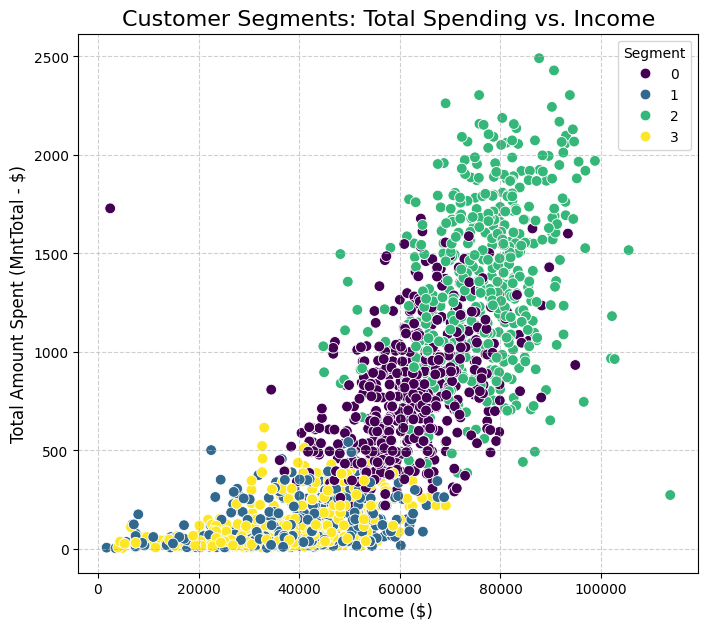

In [30]:
#Scatter Plot: Total Spending vs. Income

plt.figure(figsize=(8, 7))
sns.scatterplot(x='Income', y='MntTotal', hue='Cluster', data=df, palette='viridis', s=60)
plt.title('Customer Segments: Total Spending vs. Income', fontsize=16)
plt.xlabel('Income ($)', fontsize=12)
plt.ylabel('Total Amount Spent (MntTotal - $)', fontsize=12)
plt.legend(title='Segment', loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

C:\Users\PRITI ROUT\AppData\Local\Temp\ipykernel_14340\1939904390.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='Response_Rate_%', data=response_rates, palette='viridis')


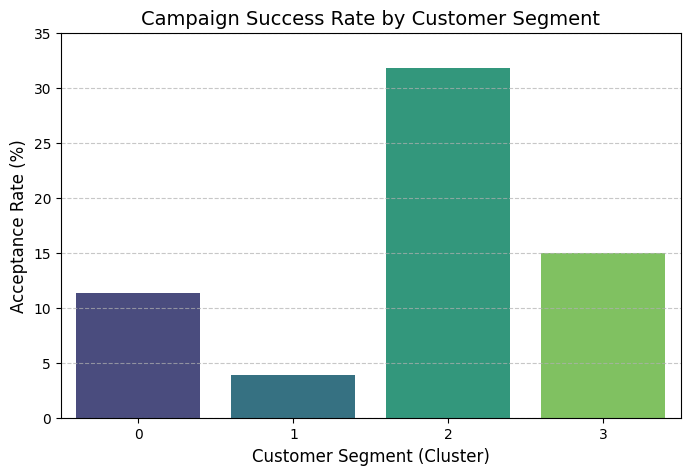

In [23]:
# Aggregate the response rate data 
response_rates = df.groupby('Cluster')['Response'].mean().reset_index()
response_rates['Response_Rate_%'] = (response_rates['Response'] * 100).round(2)

plt.figure(figsize=(8, 5))
sns.barplot(x='Cluster', y='Response_Rate_%', data=response_rates, palette='viridis')
plt.title('Campaign Success Rate by Customer Segment', fontsize=14)
plt.xlabel('Customer Segment (Cluster)', fontsize=12)
plt.ylabel('Acceptance Rate (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 35)

plt.show()

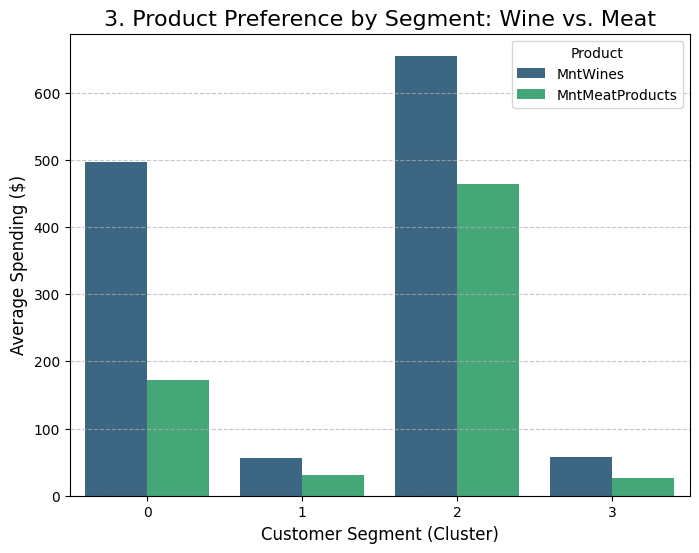

In [28]:
# Bar Chart: Product Preference (Wine vs. Meat)
product_spending = df.groupby('Cluster')[['MntWines', 'MntMeatProducts']].mean().round(2).reset_index()
product_spending_melted = product_spending.melt(id_vars='Cluster', var_name='Product', value_name='Average Spending ($)')
plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster', y='Average Spending ($)', hue='Product', data=product_spending_melted, palette='viridis')
plt.title('3. Product Preference by Segment: Wine vs. Meat', fontsize=16)
plt.xlabel('Customer Segment (Cluster)', fontsize=12)
plt.ylabel('Average Spending ($)', fontsize=12)
plt.legend(title='Product')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()